In [289]:
import torch
import VGG_FACE
from PIL import Image
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision.transforms as transforms
import glob
import numpy as np
import re
import torch.nn.functional as F
import pandas as pd
import string
import json
from collections import OrderedDict

In [ ]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [210]:
def greyscaleToRGB(image):
    im = imgTransform(image) #spits out a tensor
    npIm = im.numpy()[0]
    npIm = np.stack((npIm, npIm, npIm))
    #npim = np.expand_dims(npim, 0)
    return Variable(torch.from_numpy(npIm).unsqueeze(0), volatile = True)



In [ ]:
model = VGG_FACE.VGG_FACE
model.load_state_dict(torch.load('VGG_FACE.pth'))
model.eval()
#print(model.parameters().size())

#for param in model.parameters():
    #print(param, param.data)

In [294]:
faces = glob.glob('all-data/vids/test/*.jpg')
faces.sort(key=natural_keys)

In [296]:
# 1. Define the appropriate image pre-processing function.
preprocessFn = transforms.Compose([transforms.Scale(256), #scale to 256x256
                                   transforms.CenterCrop(224), #crops the image at center to 224x224
                                   transforms.ToTensor()])

# 2. Load the imagenet class names.
names = pd.read_csv('vgg_face_torch/names.txt', sep="\n", header=None).iloc[:, 0].values

# 3. Forward a test image of the toaster.
# Never forget to set in evaluation mode so Dropoff layers don't add randomness.
model.eval()
face_preds = OrderedDict()
totalcount = 0
#add all images to a list as numpy tensor
for image in faces:
    totalcount += 1
    print(totalcount)
    # unsqueeze(0) adds a dummy batch dimension which is required for all models in pytorch.
    im = Image.open(image).convert('RGB')
    if (im.size > (47,47)):
        inputVar =  Variable(preprocessFn(im).unsqueeze(0))
        predictions = model(inputVar)
        probs, indices = (-F.softmax(predictions)).data.sort()
        probs = (-probs).numpy()[0][:10]; indices = indices.numpy()[0][:10]
        face_preds[image] = (probs, indices)

    im.close()
    if totalcount == 4:
        break
print(face_preds)

1
2
3
4
OrderedDict([('all-data/vids/test/scene09601face1.jpg', (array([ 0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139,
        0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139], dtype=float32), array([ 598,  510, 1200, 1992, 1854, 1472,  563, 2435, 1638, 2462]))), ('all-data/vids/test/scene21265face1.jpg', (array([ 0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139,
        0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139], dtype=float32), array([1728, 2235,  384,  334, 1622, 1921,  120,  922, 1947, 2025]))), ('all-data/vids/test/scene44641face3.jpg', (array([ 0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139,
        0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139], dtype=float32), array([2440,  348, 1766,  573, 1348, 1927, 2456,  632, 1049, 2183]))), ('all-data/vids/test/scene71473face1.jpg', (array([ 0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139,
        0.00038139,  0.00038139,  0

('total count = ', 4)
all-data/vids/test/scene09601face1.jpg


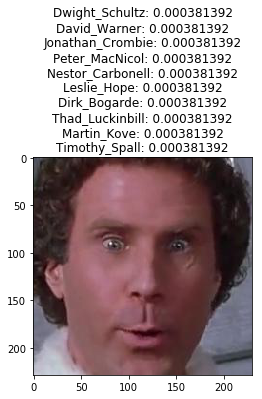

all-data/vids/test/scene21265face1.jpg


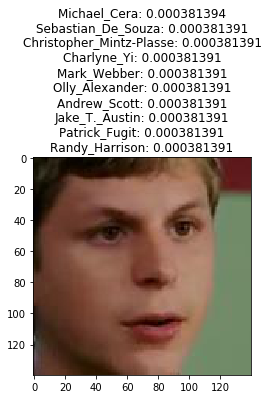

all-data/vids/test/scene44641face3.jpg


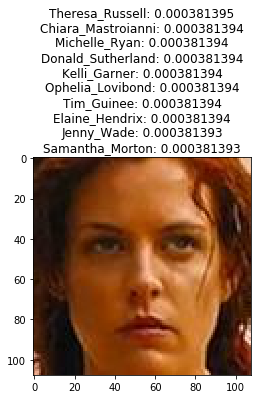

all-data/vids/test/scene71473face1.jpg


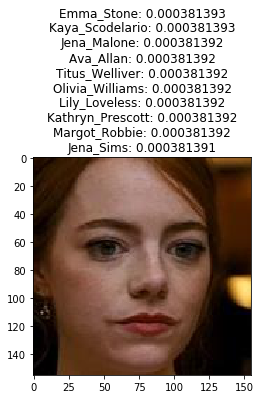

In [302]:
print("total count = ", totalcount)
#print(faces_probs)
#print(faces_indices)

for filename, probsIndices in face_preds.items():
    probs = probsIndices[0]
    indices = probsIndices[1]
    preds = [names[idx] + ': ' + str(prob) for (prob, idx) in zip(probs, indices)]
    print(filename)
    # 5. Show image and predictions
    plt.title(string.join(preds,'\n'))
    image = Image.open(filename)
    plt.imshow(image)
    plt.show(image)


(array([ 0.0003814 ,  0.00038139,  0.00038139,  0.00038139,  0.00038139,
        0.00038139,  0.00038139,  0.00038139,  0.00038139,  0.00038139], dtype=float32), array([1535,  678, 2501, 2615,    4, 2026,  924, 1738, 2235, 2083]))


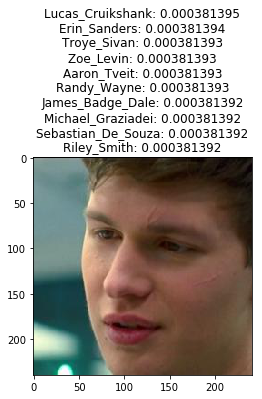

In [277]:
# 1. Define the appropriate image pre-processing function.
preprocessFn = transforms.Compose([transforms.Scale(256), #scale to 256x256
                                   transforms.CenterCrop(224), #crops the image at center to 224x224
                                   transforms.ToTensor()])

# 2. Load the imagenet class names.
names = pd.read_csv('vgg_face_torch/names.txt', sep="\n", header=None).iloc[:, 0].values

# 3. Forward a test image of the toaster.
# Never forget to set in evaluation mode so Dropoff layers don't add randomness.
model.eval()

# unsqueeze(0) adds a dummy batch dimension which is required for all models in pytorch.
image = Image.open('all-data/vids/imgs_babydriver/faces/scene57457face1.jpg').convert('RGB')

inputVar =  Variable(preprocessFn(image).unsqueeze(0))
predictions = model(inputVar)

# 4. Decode the top 10 classes predicted for this image.
# We need to apply softmax because the model outputs the last linear layer activations and not softmax scores.
probs, indices = (-F.softmax(predictions)).data.sort()
probs = (-probs).numpy()[0][:10]; indices = indices.numpy()[0][:10]
print(probs, indices)
preds = [names[idx] + ': ' + str(prob) for (prob, idx) in zip(probs, indices)]

# 5. Show image and predictions
plt.title(string.join(preds,'\n'))
plt.imshow(image);
plt.show(image);